In [3]:
import pandas as pd
import json
import os
import xarray as xr
import numpy as np

from pyciemss.visuals import vega, checks

In [4]:
data_file = '../test/data/ciemss_datacube.nc'

def read_cube(file):
    ds = xr.open_mfdataset([data_file])
    real_data  = ds.to_dataframe().reset_index()
    real_data.rename(columns={'timesteps': 'time', 
                              'experimental conditions': 'conditions', 
                              'attributes': 'state_names', 
                              '__xarray_dataarray_variable__': "state_values"}, 
                     inplace=True)
    return real_data

raw_data = read_cube(data_file)
s30 = raw_data.loc[(raw_data['time']== 30) & (raw_data['state_names'] == "S")]
i30 = raw_data.loc[(raw_data['time']== 30) & (raw_data['state_names'] == "I")]
r30 = raw_data.loc[(raw_data['time']== 30) & (raw_data['state_names'] == "R")]

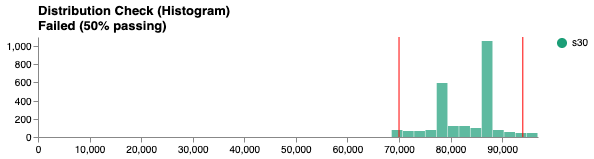

In [5]:
lower, upper = 70_000, 94_000
result = checks.check_distribution_range(
                    s30, lower, upper,
                    label="s30",
                    tests={"full": checks.contains(lower, upper), 
                            "most": checks.contains(lower, upper, .99)})
vega.ipy_display(result.schema)

In [6]:
result

Result(status:False, checks:{'full': True, 'most': False}, schema:<present>; Additional Fields: ['bins'])

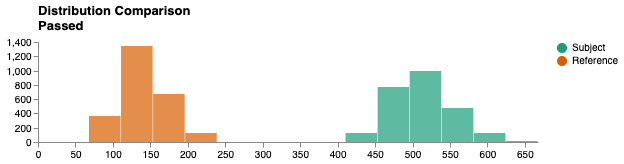

In [7]:
result = checks.compare_distributions(r30, i30, tests=[checks.JS(1)])
vega.ipy_display(result.schema)

In [8]:
result

Result(status:True, checks:{0: True}, schema:<present>; Additional Fields: ['aligned'])